### Autores

- Bruno Leandro Pereira
Ra 791067

- Carlos Eduardo Fontaneli
RA 769949 

- Ivan Duarte Calvo 
Ra 790739

### Importação das Bibliotecas Externas

In [59]:
# Importando bibliotecas necessárias
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

### Descrição do Conjunto de Dados

O conjunto de dados escolhido é relativo a dados de clientes de um determinado empresa em relação a seus hábitos de consumo e suas respostas as campanhas de marketing elaboradas pela empresa. 
O principal objetivo do conjunto de dados é entender o comportamento dos clientes e suas reações a determinadas campanhas que a empresa faz, para que assim os produtos e camapanhas sejam direcionados aos clientes de acordo com suas necessidades. 
Para tanto o conjunto de dados conta com atributos como: nivel de escolaridade dos clientes, estado civil, renda, quantidade de crianças em casa entre outros dados.

In [60]:
# Conjunto de Dados
dataset = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
dataset.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Análise Exploratória dos Dados

Nessa etapa, foram analisados os tipos de dados e a formas como os mesmo estão expressos dentro do conjunto. 

In [61]:
dataset.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Pré-processamento dos dados e engenharia de atributos

Nesta etapa, foram aplicadas algumas técnicas de pré-processamento dos dados e engenharia de atributos como remoção, unificação e transformação de dados. 

In [63]:
# Removendo as colunas onde os dados sao todos iguais e o ID
dataset=dataset.drop(columns=["Z_CostContact", "Z_Revenue", 'ID'],axis=1)

In [64]:
# Conferindo os valores únicos das variáveis nominais
print(dataset['Education'].unique())
print(dataset['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [65]:
# Trocando os valores vazios de renda pela media do dataset
dataset['Income']=dataset['Income'].fillna(dataset['Income'].median())

In [66]:
# Simplificando os valores do estado civil e educacao
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Married', 'Together'],
                                                              'Relationship')
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 
                                                               'YOLO', 'Absurd'],
                                                              'Single')
dataset['Education'] = dataset['Education'].replace(['Basic', '2n Cycle'],
                                                    'Undergraduate')
dataset['Education'] = dataset['Education'].replace(['PhD', 'Master', 'Postgraduate'],
                                                    'Postgraduate')

In [67]:
# Convertendo os dados de tempo para formato de data e utilizando apenas o ano
dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"], 
                                        infer_datetime_format=True, 
                                        dayfirst=True)
dates = []
for i in dataset["Dt_Customer"]:
    i = i.date().year
    dates.append(i)  
    
dataset["Dt_Customer"] = dates
dataset["Dt_Customer"].head()

0    2012
1    2014
2    2013
3    2014
4    2014
Name: Dt_Customer, dtype: int64

In [68]:
# Convertendo o atributo ano de nascimento pela idade do cliente
dataset["Age"] = 2022-dataset["Year_Birth"]
dataset = dataset.drop(columns='Year_Birth', axis=1)

# Unificando os gastos em produtos para apenas uma coluna coluna geral de gastos totais
dataset["Spent"] = dataset["MntWines"] + \
                   dataset["MntFruits"] + \
                   dataset["MntMeatProducts"] + \
                   dataset["MntFishProducts"] + \
                   dataset["MntSweetProducts"] + \
                   dataset["MntGoldProds"]
                   
# Unificando as compras em apenas uma coluna de compras totais
dataset["Purchases"] = dataset["NumDealsPurchases"] + \
                       dataset["NumWebPurchases"] + \
                       dataset["NumCatalogPurchases"] + \
                       dataset["NumStorePurchases"] 

# Quantificando a quantidade de filhos num mesmo cliente
dataset["Children"]= dataset["Kidhome"] + dataset["Teenhome"]
dataset = dataset.drop(columns=['Kidhome', 'Teenhome'], axis=1)

### Análise Exploratória do novo Dataset

Nessa etapa, foram elaborados gráficos e figuras que permitem uma melhor comprensão sobre a distribuição dos dados dentro do conjunto. Além disso, buscou-se analisar possíveis desbalanceamentos entre classes e/ou outliers.

<Figure size 1440x1440 with 0 Axes>

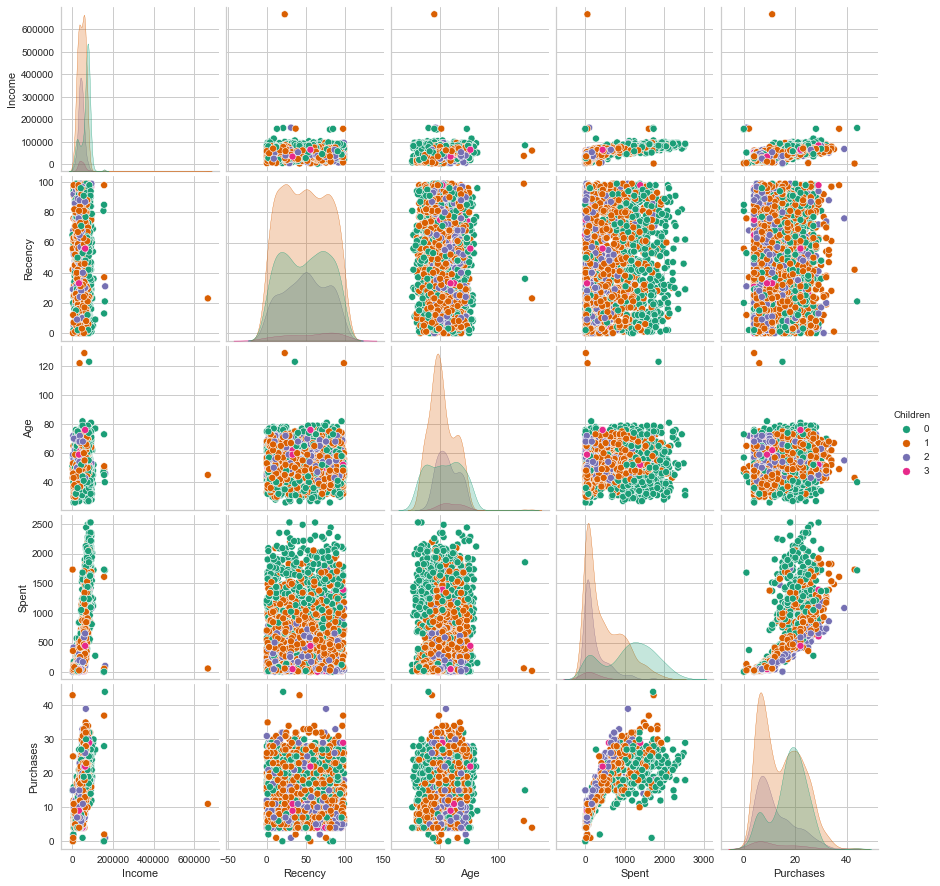

In [69]:
# Plotando os principais atributos do dataset em pares e relacionados a quantidade de filhos de cada cliente
plot = [ "Income", "Recency", "Age", "Spent", "Children", "Purchases"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Children", palette="Dark2")
_ = plt.show()

<Figure size 1440x1440 with 0 Axes>

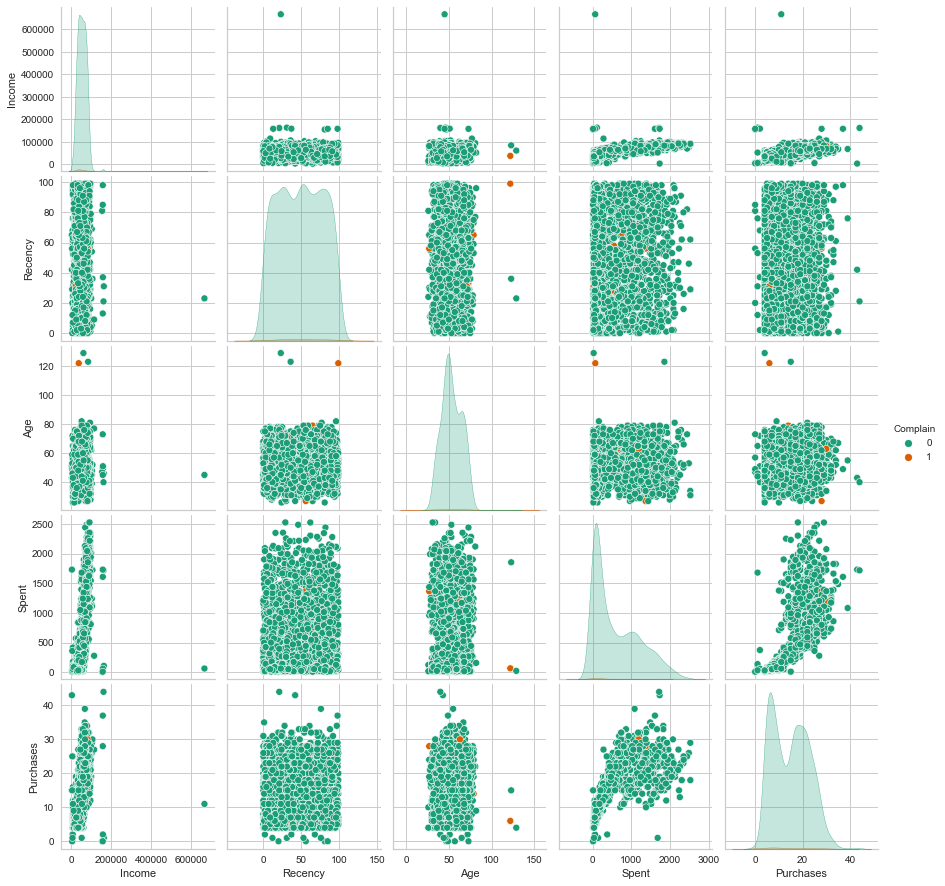

In [70]:
# Plotando os principais atributos do dataset em pares e relacionados se o cliente ja reclamou alguma vez
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Complain"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Complain", palette="Dark2")
#Taking hue 
_ = plt.show()

<Figure size 1440x1440 with 0 Axes>

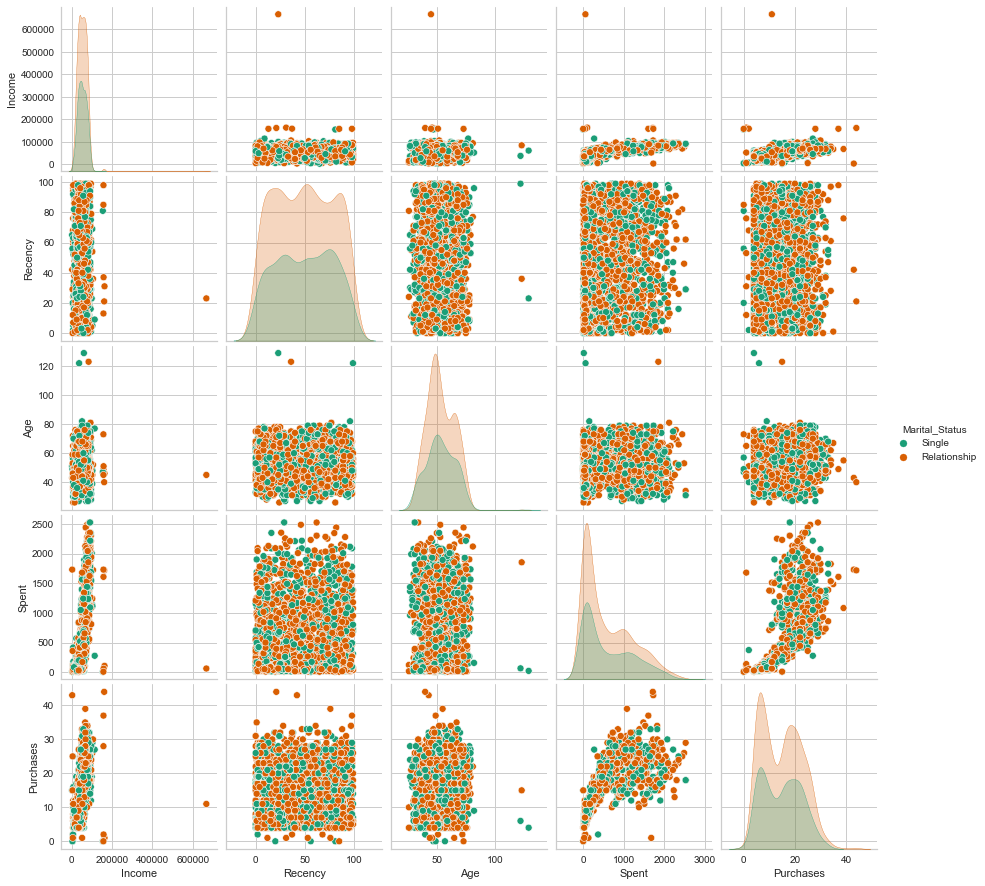

In [71]:
 # Plotando os principais atributos do dataset em pares e relacionados ao estado civil do cliente
To_Plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Marital_Status"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[To_Plot], hue= "Marital_Status", palette="Dark2")
#Taking hue 
_ = plt.show()

Após a análise dos gráficos é possível perceber alguns outliers nas colunas de idade e de renda, portanto foram removidos os dados dessas colunas que ultrapassavam um determinado valor.

In [72]:
# Removendo possiveis outliers
dataset = dataset[(dataset["Age"] < 90)]
dataset = dataset[(dataset["Income"] < 600000)]

In [73]:
(dataset.dtypes == 'object')

Education               True
Marital_Status          True
Income                 False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Spent                  False
Purchases              False
Children               False
dtype: bool

### Pré-Processamento do dataset para execucao dos algoritmos de agrupamento

Nesta etapa, foram aplicadas as técnicas de discretização e normalização dos dados, além da redução de dimensionalidade visando a aplicação de técnicas de agrupamento.

In [74]:
# Convertendo os atributos categóricos em numericos
categorical = (dataset.dtypes == 'object')
object_cols = list(categorical[categorical].index)

LE = LabelEncoder()
classes = []
for i in object_cols:
    classes.append(dataset[i])
    dataset[i]=dataset[[i]].apply(LE.fit_transform)

dataset.head()

Education  Marital_Status   Income  Dt_Customer  Recency  MntWines  \
0          0               1  58138.0         2012       58       635   
1          0               1  46344.0         2014       38        11   
2          0               0  71613.0         2013       26       426   
3          0               0  26646.0         2014       26        11   
4          1               0  58293.0         2014       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         88              546              172                88  ...   
1          1                6                2                 1  ...   
2         49              127              111                21  ...   
3          4               20               10                 3  ...   
4         43              118               46                27  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Spent  Purchases  Children  
0   65   1617         25         0  
1   68     27          6         2  
2   57    776         21         0  
3   38     53          8         1  
4   41    422         19         1  

[5 rows x 27 columns]

In [75]:
dataset['Education'].unique()

array([0, 1, 2])

In [76]:
# Normalizando os dados
scaler = StandardScaler()
scaler.fit(dataset)
scaled_dataset = pd.DataFrame(scaler.transform(dataset),
                              columns= dataset.columns)

scaled_dataset.head()

Education  Marital_Status    Income  Dt_Customer   Recency  MntWines  \
0   -0.89438        1.347635  0.288947    -1.500981  0.306856  0.983228   
1   -0.89438        1.347635 -0.262003     1.419988 -0.383971 -0.871064   
2   -0.89438       -0.742041  0.918423    -0.040496 -0.798467  0.362159   
3   -0.89438       -0.742041 -1.182183     1.419988 -0.798467 -0.871064   
4    0.57070       -0.742041  0.296187     1.419988  1.550344 -0.389661   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0   1.554170         1.679746         2.461068          1.475396  ...   
1  -0.636431        -0.713455        -0.650414         -0.631638  ...   
2   0.572177        -0.177201         1.344595         -0.147262  ...   
3  -0.560893        -0.651409        -0.503991         -0.583200  ...   
4   0.421101        -0.217088         0.154911         -0.001950  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001  2.386338   
1     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
2     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
3     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
4     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   

        Age     Spent  Purchases  Children  
0  1.016868  1.680176   1.319340 -1.264308  
1  1.273264 -0.962202  -1.155857  1.395139  
2  0.333146  0.282541   0.798246 -1.264308  
3 -1.290693 -0.918994  -0.895310  0.065416  
4 -1.034298 -0.305762   0.537699  0.065416  

[5 rows x 27 columns]

In [77]:
# Reduzindo a demensionalidade do dataset para 3
pca = PCA(n_components=3,random_state=9863)
pca.fit(scaled_dataset)
pca_dataset = pd.DataFrame(pca.transform(scaled_dataset), 
                           columns=(["x","y", "z"]))
pca_dataset.describe().T

count          mean       std       min       25%       50%       75%  \
x  2236.0  4.766610e-17  2.854663 -5.001065 -2.647242 -0.730001  2.332018   
y  2236.0  3.813288e-17  1.476371 -3.946039 -1.050806 -0.282794  0.906903   
z  2236.0 -7.467690e-17  1.378520 -3.109329 -0.676555 -0.132683  0.254824   

        max  
x  8.608987  
y  6.073865  
z  8.975004

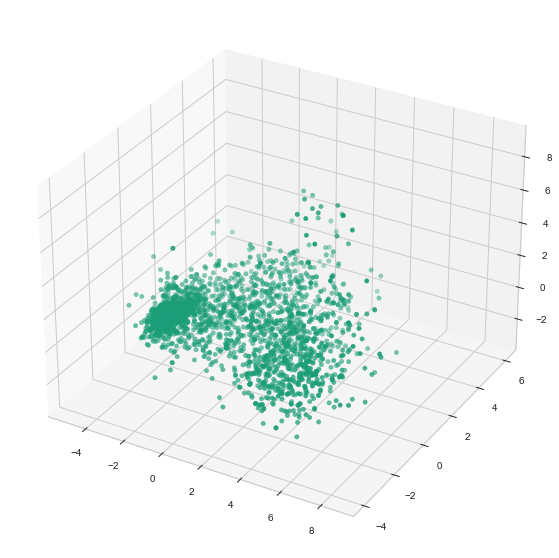

In [78]:
# Plotando os dados reduzidos
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_dataset["x"],pca_dataset["y"],pca_dataset["z"], marker="o" )
plt.show()

### DBSCAN 

Para a aplicação do DBSCAN é necessário a configuração de 2 parâmetros, a quantidade mínima de pontos e $\epsilon$ que é a distância máxima entre um ponto e outro para serem considerados partes do mesmo cluster. Após pesquisas feitas sobre o algoritmo, o grupo decidiu para configurar a quantidade mínima de pontos para 2 vezes o número de dimensões do dataset original. Para $\epsilon$ optou-se por analisar com a técnica do joelho as distâncias entre um ponto e outro do dataset, para o cálculo de distância utilizou-se o algoritmo K-Nearest Neighbours.

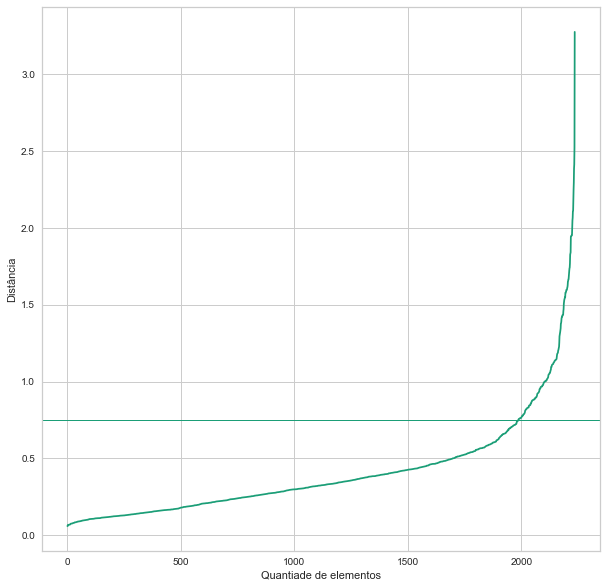

In [79]:
# Aplicação do KNN
nbrs = NearestNeighbors(n_neighbors=54).fit(pca_dataset)
neigh_dist, neigh_ind = nbrs.kneighbors(pca_dataset)

# Ordenando os resultados obtidos
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 4]
fig = plt.figure(figsize=(10,10))
plt.plot(k_dist)
plt.axhline(y=0.75, linewidth=1)
plt.ylabel("Distância")
plt.xlabel("Quantiade de elementos")
plt.show()

In [80]:
# Aplicando o DBSCAN
clusters = DBSCAN(eps=0.75, min_samples=54).fit(pca_dataset)
dataset['Clusters_dbscan'] = clusters.labels_

# Conferindo clusters resultantes
set(clusters.labels_)

{-1, 0}

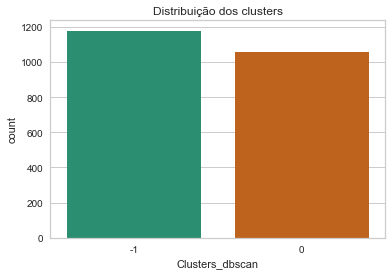

In [81]:
# Distribuição de dados nos clusters
pl = sns.countplot(x=dataset["Clusters_dbscan"])
pl.set_title("Distribuição dos clusters")
plt.show()

<Figure size 1440x1440 with 0 Axes>

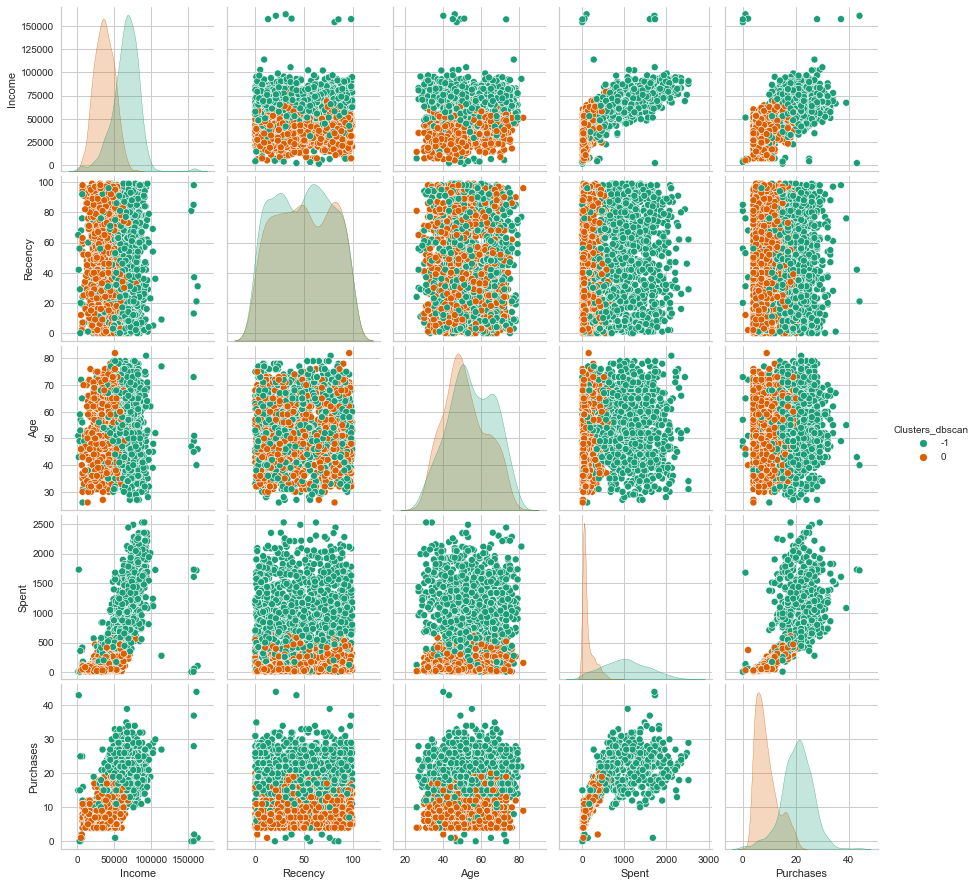

In [82]:
# Plotando os principais atributos do dataset em pares e relacionados aos clusters
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Clusters_dbscan"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Clusters_dbscan", palette="Dark2")
#Taking hue 
_ = plt.show()

## KMeans

O primeiro passo para a aplicação do KMeans é a escolha do número k de Clusters a serem utilizados, para isso foram utilizadas as funções `KElbowVisualizer` e `silhoutte_score` que indicaram o valor k=4 como ideal dentro do modelo proposto. Também foi utilizado o número pseudo-aleatório 9863 (o mesmo utilizado anteriormente no código) para controlar a aleatoriedade dentro do algoritmo. Após essas definições foi aplicado o algoritmo que dividiu o dataset em quatro clusters e a análise desse agrupamento será abordada adiante.

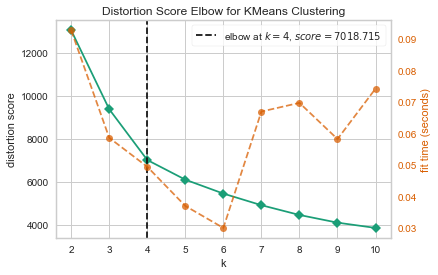

In [83]:
# Buscando o numero ideal de cluster atraves da analise do cotovelo com utilizacao do KMeans
Elbow_M = KElbowVisualizer(KMeans(init='k-means++', n_init=10, random_state=9863), k=10)
Elbow_M.fit(pca_dataset)
_ = Elbow_M.show()

In [84]:
sil = []
kmax = 10
x = []

for k in range(2, kmax+1):
  kmeansTest = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=9863).fit(pca_dataset)
  labels = kmeansTest.labels_
  sil.append(silhouette_score(pca_dataset, labels, metric = 'euclidean'))
  x.append(k)

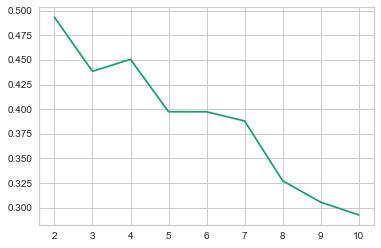

In [85]:
plt.plot(x, sil)
plt.show()

In [86]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=9863)
kmeans_pca = kmeans.fit(pca_dataset)
dataset['ClustersKMeans'] = kmeans_pca.labels_

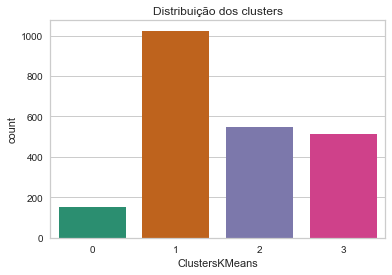

In [87]:
# Distribuição de dados nos clusters
pl = sns.countplot(x=dataset["ClustersKMeans"])
pl.set_title("Distribuição dos clusters")
plt.show()

<Figure size 1440x1440 with 0 Axes>

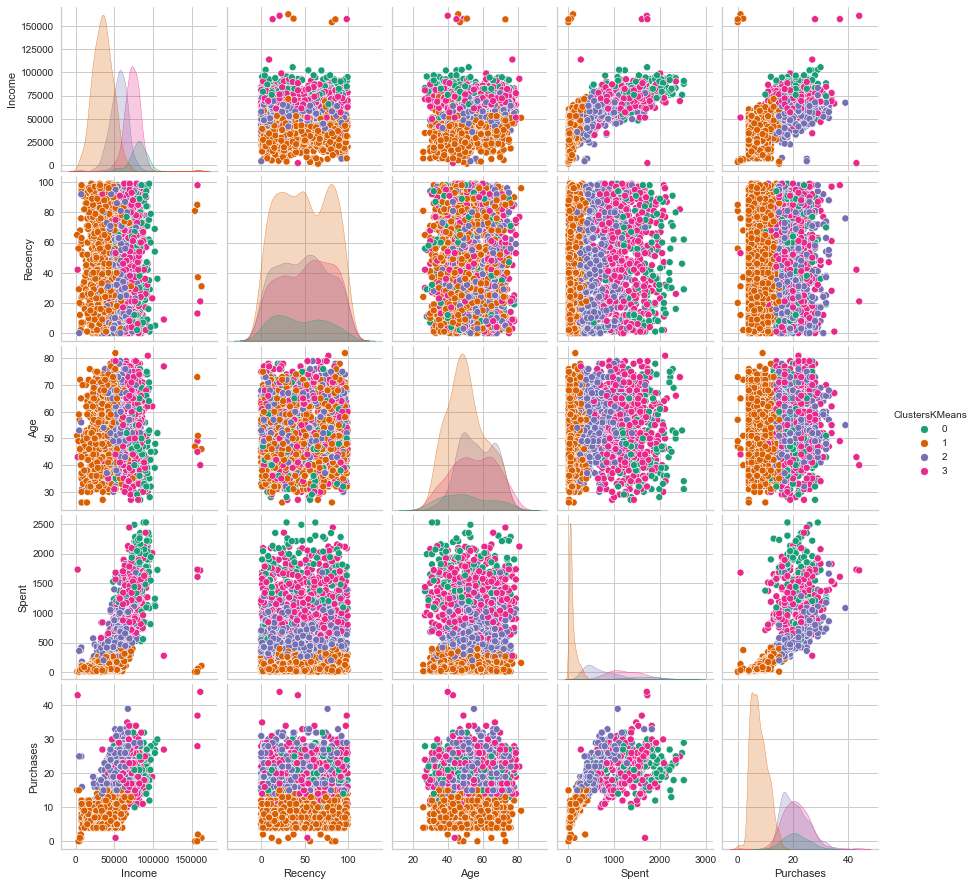

In [88]:
# Plotando os principais atributos do dataset em pares e relacionados aos clusters
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "ClustersKMeans"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "ClustersKMeans", palette="Dark2")
_ = plt.show()

## Agrupamento Hierárquico
Já na aplicação do Agrupamento Hierárquico, escolhemos a técnica bottom-up ou agrupamento aglomerativo, que consiste em mesclar os dois clusters/pontos mais próximos. Após observarmos diferentes resultados, optamos pela divisão em 4 clusters.

In [89]:
# Carregando o modelo
agg_clus = AgglomerativeClustering(affinity='euclidean', linkage= 'ward', n_clusters= 4)
clusters = agg_clus.fit_predict(pca_dataset)

# Salvando o resultado no dataset
pca_dataset["Clusters_aggclus"]= clusters
dataset["Clusters_aggclus"]= clusters

dataset

Education  Marital_Status   Income  Dt_Customer  Recency  MntWines  \
0             0               1  58138.0         2012       58       635   
1             0               1  46344.0         2014       38        11   
2             0               0  71613.0         2013       26       426   
3             0               0  26646.0         2014       26        11   
4             1               0  58293.0         2014       94       173   
...         ...             ...      ...          ...      ...       ...   
2235          0               0  61223.0         2013       46       709   
2236          1               0  64014.0         2014       56       406   
2237          0               1  56981.0         2014       91       908   
2238          1               0  69245.0         2014        8       428   
2239          1               0  52869.0         2012       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0            88              546              172                88  ...   
1             1                6                2                 1  ...   
2            49              127              111                21  ...   
3             4               20               10                 3  ...   
4            43              118               46                27  ...   
...         ...              ...              ...               ...  ...   
2235         43              182               42               118  ...   
2236          0               30                0                 0  ...   
2237         48              217               32                12  ...   
2238         30              214               80                30  ...   
2239          3               61                2                 1  ...   

      AcceptedCmp2  Complain  Response  Age  Spent  Purchases  Children  \
0                0         0         1   65   1617         25         0   
1                0         0         0   68     27          6         2   
2                0         0         0   57    776         21         0   
3                0         0         0   38     53          8         1   
4                0         0         0   41    422         19         1   
...            ...       ...       ...  ...    ...        ...       ...   
2235             0         0         0   55   1341         18         1   
2236             0         0         0   76    444         22         3   
2237             0         0         0   41   1241         19         0   
2238             0         0         0   66    843         23         1   
2239             0         0         1   68    172         11         2   

      Clusters_dbscan  ClustersKMeans  Clusters_aggclus  
0                  -1               3                 0  
1                   0               1                 1  
2                  -1               3                 0  
3                   0               1                 1  
4                   0               2                 2  
...               ...             ...               ...  
2235               -1               3                 0  
2236               -1               2                 2  
2237               -1               3                 0  
2238               -1               3                 0  
2239               -1               1                 1  

[2236 rows x 30 columns]

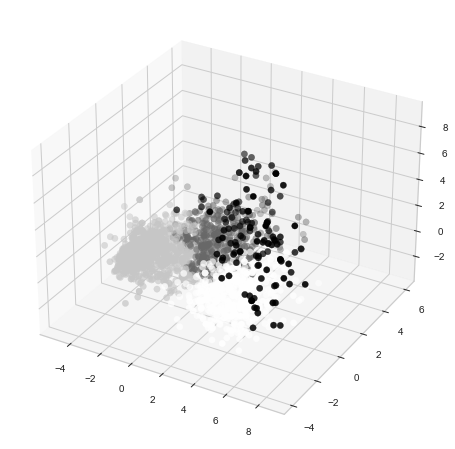

In [90]:
x = pca_dataset["x"]
y = pca_dataset["y"]
z = pca_dataset["z"]

# Gráfico da distribuição dos clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=pca_dataset["Clusters_aggclus"], marker='o')
plt.show()

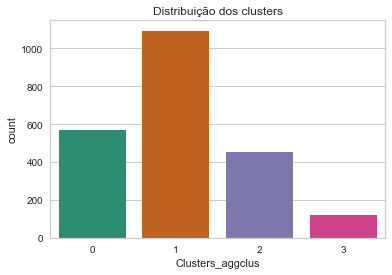

In [91]:
# Distribuição de dados nos clusters
pl = sns.countplot(x=dataset["Clusters_aggclus"])
pl.set_title("Distribuição dos clusters")
plt.show()

<Figure size 1440x1440 with 0 Axes>

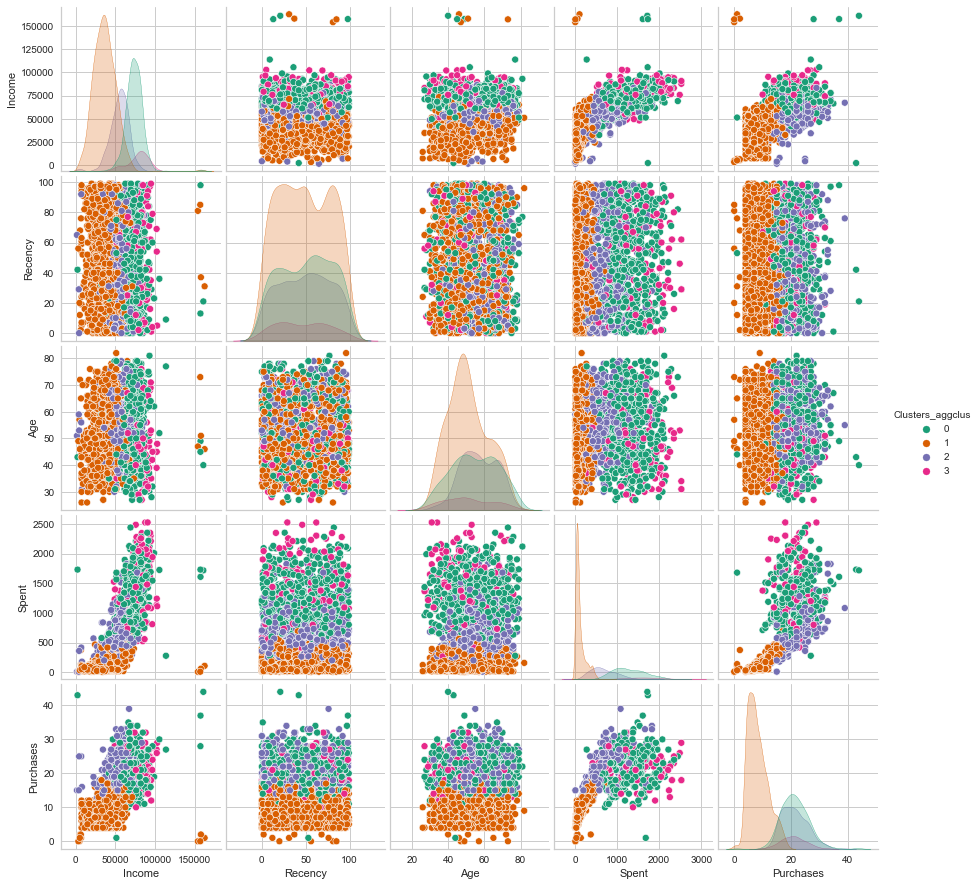

In [92]:
# Plotando os principais atributos do dataset em pares e relacionados aos clusters
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Clusters_aggclus"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Clusters_aggclus",  palette="Dark2")
# Taking hue 
_ = plt.show()

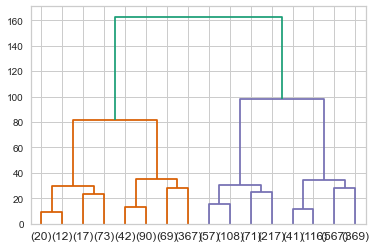

In [93]:
#Dendrograma
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(pca_dataset, 'ward'), truncate_mode= 'level', p = 3)
plt.show()

### Extração de Características dos Clusters - resultados do KMeans

Após a análise das distribuições de elementos em cada cluster e da disposição dos clusters dado a plotagem dos  principais atributos dois a dois, o grupo decidiu que o KMeans apresnetou um resultado mais plausível de interpretação e com mais facilidade de extração de características. Dessa forma, a análise de características de cada cluster foi feita baseada nos resultados do KMeans.

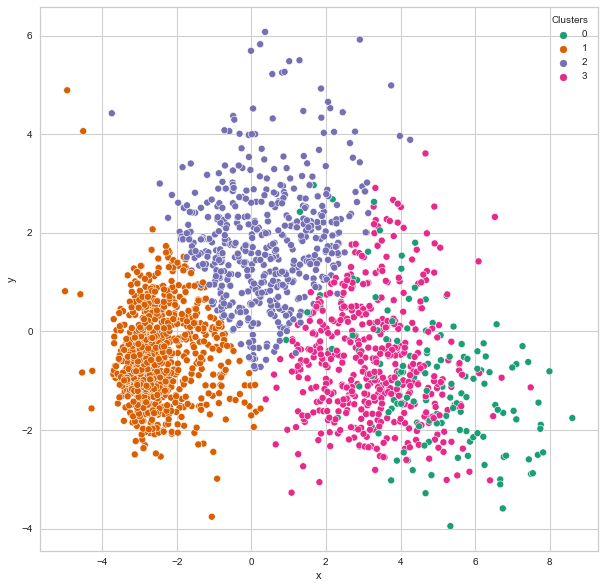

In [94]:
# Análise da distribuicao dos clusters em relação ao conjunto subdimensionalizado com PCA para o eixo xy
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=pca_dataset, 
                    x="x", 
                    y="y", 
                    hue=kmeans_pca.labels_, 
                    legend="full", 
                    palette="Dark2")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

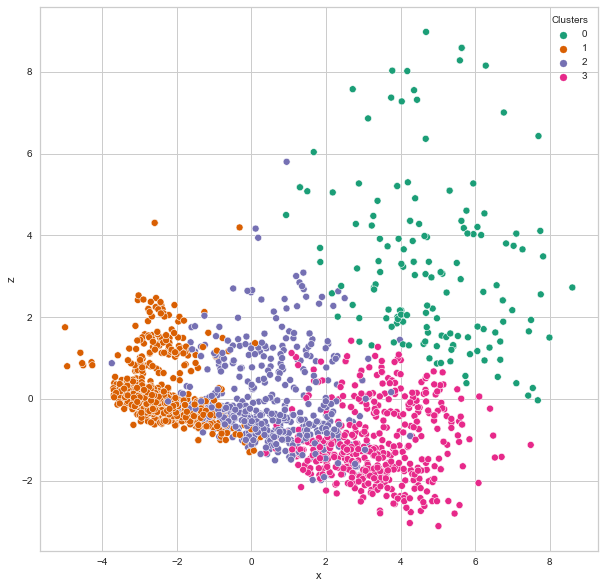

In [95]:
# Análise da distribuicao dos clusters em relação ao conjunto subdimensionalizado com PCA para o eixo xz
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=pca_dataset, 
                    x="x", 
                    y="z", 
                    hue=kmeans_pca.labels_, 
                    legend="full", 
                    palette="Dark2")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

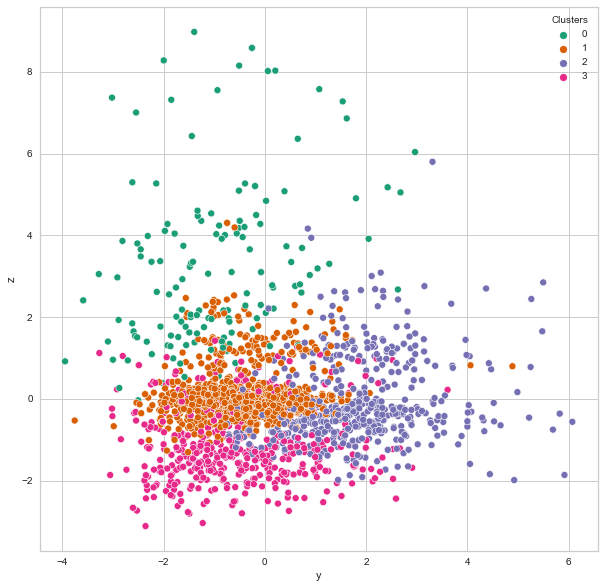

In [96]:
# Análise da distribuicao dos clusters em relação ao conjunto subdimensionalizado com PCA para o eixo yz
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=pca_dataset, 
                    x="y", 
                    y="z", 
                    hue=kmeans_pca.labels_, 
                    legend="full", 
                    palette="Dark2")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

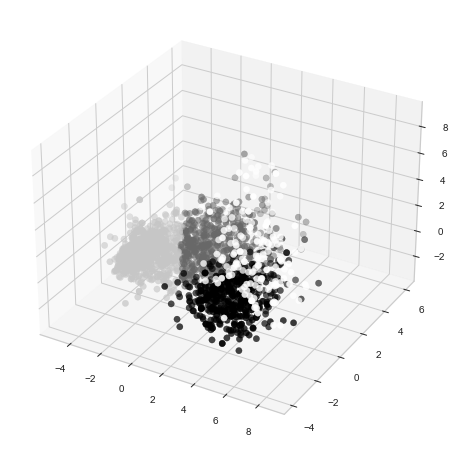

In [97]:
# Grafico 3D da distribuicao dos clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_pca.labels_, marker='o')
plt.show()

### Aceitação de Promoção 

É possível perceber que a grande maioria dos indivíduos dos clusters 0, 1 e 2 não aceitaram nenhuma promoção, mostrando uma resposta ruim as campanhas de marketing realizadas, apenas poucos indivíduos aceitaram 1 ou 2 promoções. Por outro lado, o cluster 2 possui indíviduos que aceitaram ao menos 1 promoção o que mostra que há clientes que são receptivos a campanhas de marketing, contudo são uma parcela pequena.<br>
Dessa forma, é possível afirmar que as campanhas de marketing tiveram pouco efeito sobre a maioria dos clientes, mas que há certos clientes propensos a aceitarem determinadas promoções.

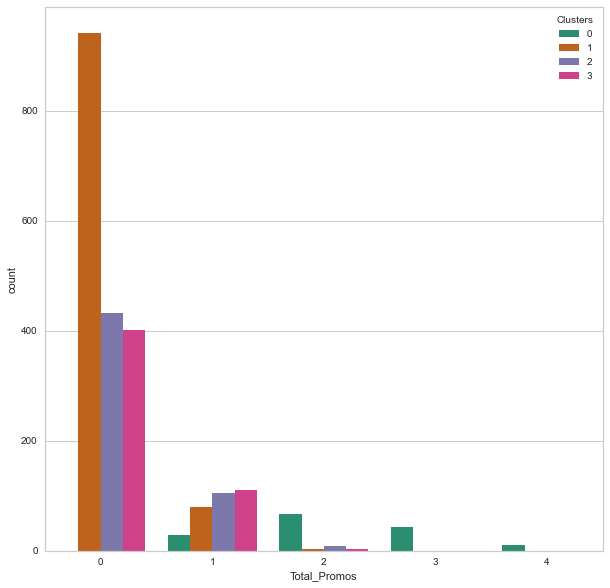

In [98]:
# Somando as promoções aceitas em apenas uma coluna
dataset["Total_Promos"] = dataset["AcceptedCmp1"] + \
                          dataset["AcceptedCmp2"] + \
                          dataset["AcceptedCmp3"] + \
                          dataset["AcceptedCmp4"] + \
                          dataset["AcceptedCmp5"]

# Análise dos clusters relação a quantidade de promoções aceitas por cada cluster
fig = plt.figure(figsize=(10,10))
p = sns.countplot(x=dataset['Total_Promos'], hue=kmeans_pca.labels_, palette="Dark2")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

### Comportamento dos clientes em relação ao seu gasto

##### Cluster 0:
- Mostrou ser o menor cluster; <br>
- Gasto relativamente alto; <br>
- Clientes desde 2013; <br>
- Idade entre 40 e 50 anos; <br>
- Sem filhos; <br>
- Uma das rendas mais alta; <br>
- Possui diploma de nível superior, pelo menos; <br>
- Estão em um relacionamento; <br>

##### Cluster 1:

- Cluster com o menor gasto; <br>
- Em sua maioria, os indíviduos possuem baixa escolaridade, apesar de conter elementos com todos os níveis de escolaridade; <br>
- Em sua maioria possui ao menos 1 filhos; <br>
- Possuem uma menor renda; <br>
- Grande maioria são clientes a partir de 2013; <br>

##### Cluster 2:

- Tem gastos mais distribúidos; <br>
- Clientes com ao menos 30 anos de idade; <br>
- A grande maioria possui ao menos 1 filho; <br>
- Tem uma renda mais distribuída; <br>
- A grande maioria possui diploma de nível superior; <br>


##### Cluster 3:

- Tem gastos distribuídos, mas a maioria um pouco acima dos demais clusters; <br>
- Em sua maioria são clientes adultos com 40 anos ou mais; <br>
- Possuem no máximo 1 filho, mas a maioria não é pai; <br>
- Possuem uma renda elevada; <br>
- A grande maioria possui diploma de nível superior; <br>

<Figure size 720x720 with 0 Axes>

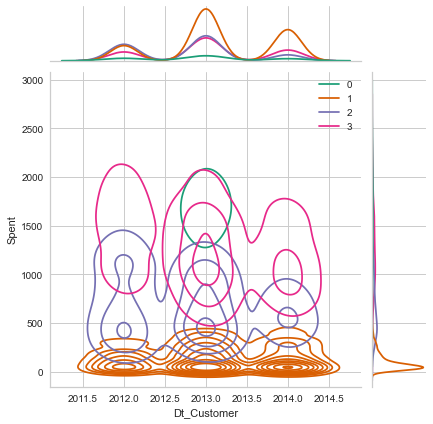

<Figure size 720x720 with 0 Axes>

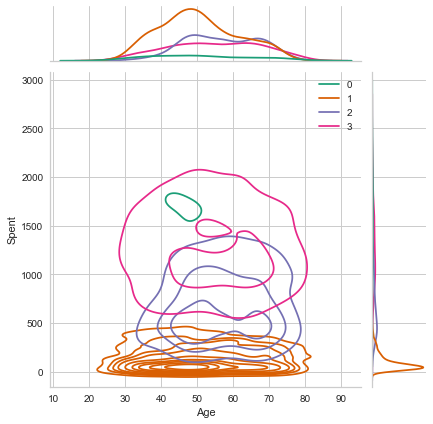

<Figure size 720x720 with 0 Axes>

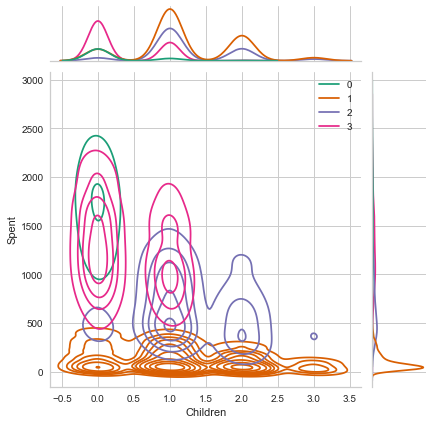

<Figure size 720x720 with 0 Axes>

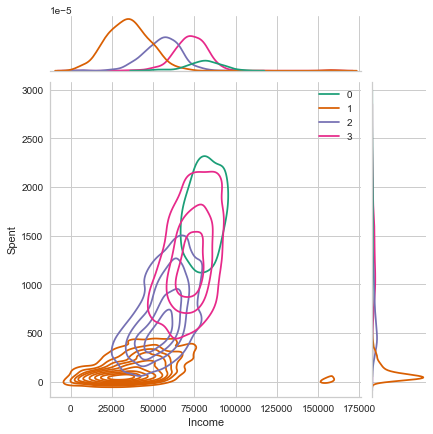

In [99]:
Features = ["Dt_Customer", "Age", "Children", "Income"]

for i in Features:
    plt.figure(figsize=[10, 10])
    sns.jointplot(x=dataset[i], y=dataset["Spent"], hue=kmeans_pca.labels_, kind="kde", palette="Dark2")
    plt.show()

<Figure size 720x720 with 0 Axes>

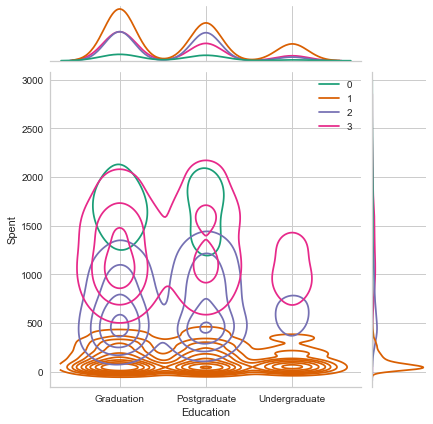

In [100]:
plt.figure(figsize=[10, 10])
plot = sns.jointplot(x=dataset['Education'], y=dataset["Spent"], hue=kmeans_pca.labels_, kind="kde", palette="Dark2")
plot.ax_joint.set_xticks(range(0, 3), classes[0].unique())
plt.show()

<Figure size 720x720 with 0 Axes>

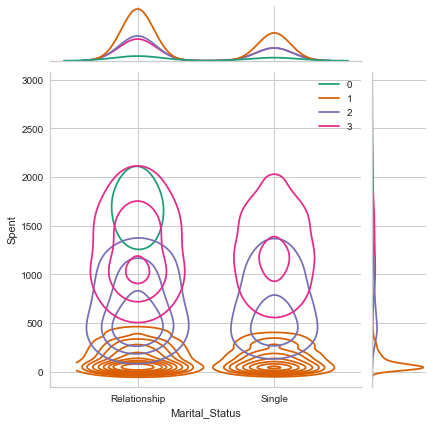

In [101]:
plt.figure(figsize=[10, 10])
plot = sns.jointplot(x=dataset['Marital_Status'], y=dataset["Spent"], hue=kmeans_pca.labels_, kind="kde", palette="Dark2")
plot.ax_joint.set_xticks([1, 0], classes[1].unique())
plt.show()

### Comportamento dos clientes em relação à quantidade de compras:
#### Cluster 0:
- É o menor cluster dentre os criados;<br>
- Agrupamento dos clientes que realizaram um alto número de compras;<br>
- O estado civil e a idade são bem distribuídos. Quase todos não possuem filhos e, por fim é um cluster com uma das rendas mais altas em comparação aos outros;<br>
#### Cluster 1:
- É o maior cluster dentre os criados.<br>
- Agrupamento dos clientes que realizaram o menor número de compras;<br>
- O estado civil não é extremamente discrepante, mas há uma vantagem no número de pessoas em relacionamento e também é o grupo mais jovem quando se comparado aos outros clusters. A maior parte possui um ou dois filhos e, por fim é também o cluster com a menor renda;<br>
- A maioria dos membros do grupo se tornou cliente a partir de 2013;<br>
#### Clusters 2 e 3:
- São dois clusters com grande quantidade de membros;<br>
- Ambos realizaram uma elevada quantidade de compras;<br>
- As maiores diferenças são no número de filhos e na renda. O cluster 2 tem em média mais filhos, com a maior parte dos membros tendo entre um e dois, enquanto no cluster 3 a maior parte tem entre um e dois filhos. Na renda, o cluster 3 está concentrado nos clientes com uma renda mais elevada que no cluster 2;<br>
- Pouquíssimos membros desse agrupamento não possuem graduação;<br>

<Figure size 720x720 with 0 Axes>

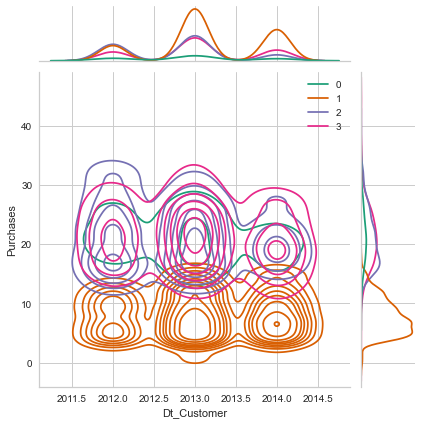

<Figure size 720x720 with 0 Axes>

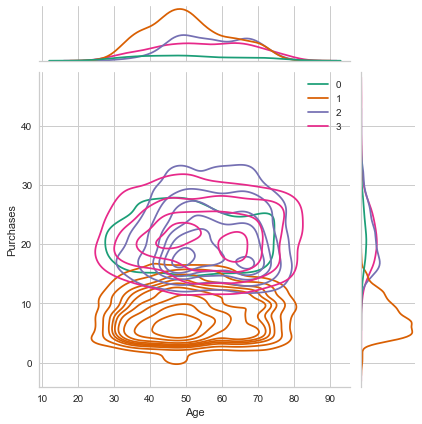

<Figure size 720x720 with 0 Axes>

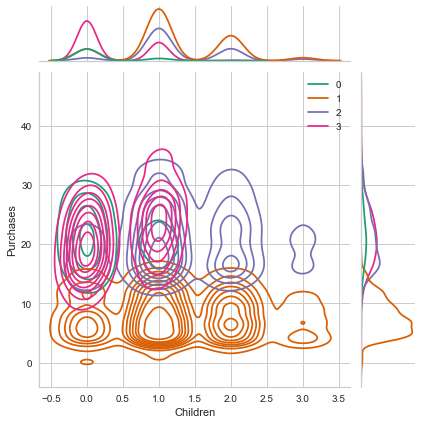

<Figure size 720x720 with 0 Axes>

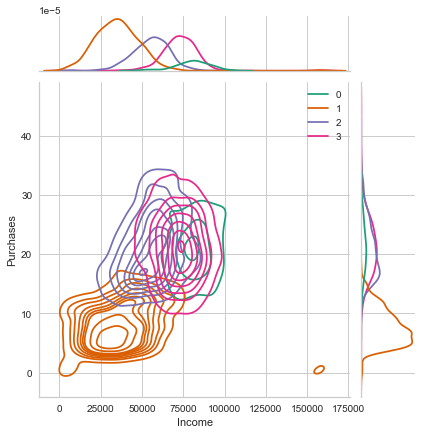

In [102]:
Features = ["Dt_Customer", "Age", "Children", "Income"]

for i in Features:
    plt.figure(figsize=[10, 10])
    sns.jointplot(x=dataset[i], y=dataset["Purchases"], hue=kmeans_pca.labels_, kind="kde", palette="Dark2")
    plt.show()

<Figure size 720x720 with 0 Axes>

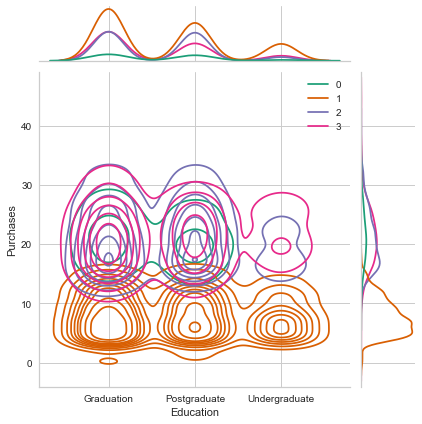

In [103]:
plt.figure(figsize=[10, 10])
plot = sns.jointplot(x=dataset['Education'], y=dataset["Purchases"], hue=kmeans_pca.labels_, kind="kde", palette="Dark2")
plot.ax_joint.set_xticks(range(0, 3), classes[0].unique())
plt.show()

<Figure size 720x720 with 0 Axes>

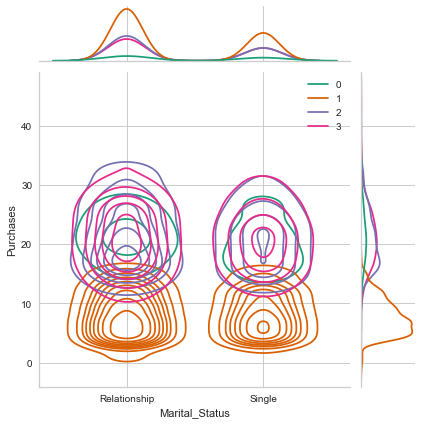

In [104]:
plt.figure(figsize=[10, 10])
plot = sns.jointplot(x=dataset['Marital_Status'], y=dataset["Purchases"], hue=kmeans_pca.labels_, kind="kde", palette="Dark2")
plot.ax_joint.set_xticks([1, 0], classes[1].unique())
plt.show()

<Figure size 1440x1440 with 0 Axes>

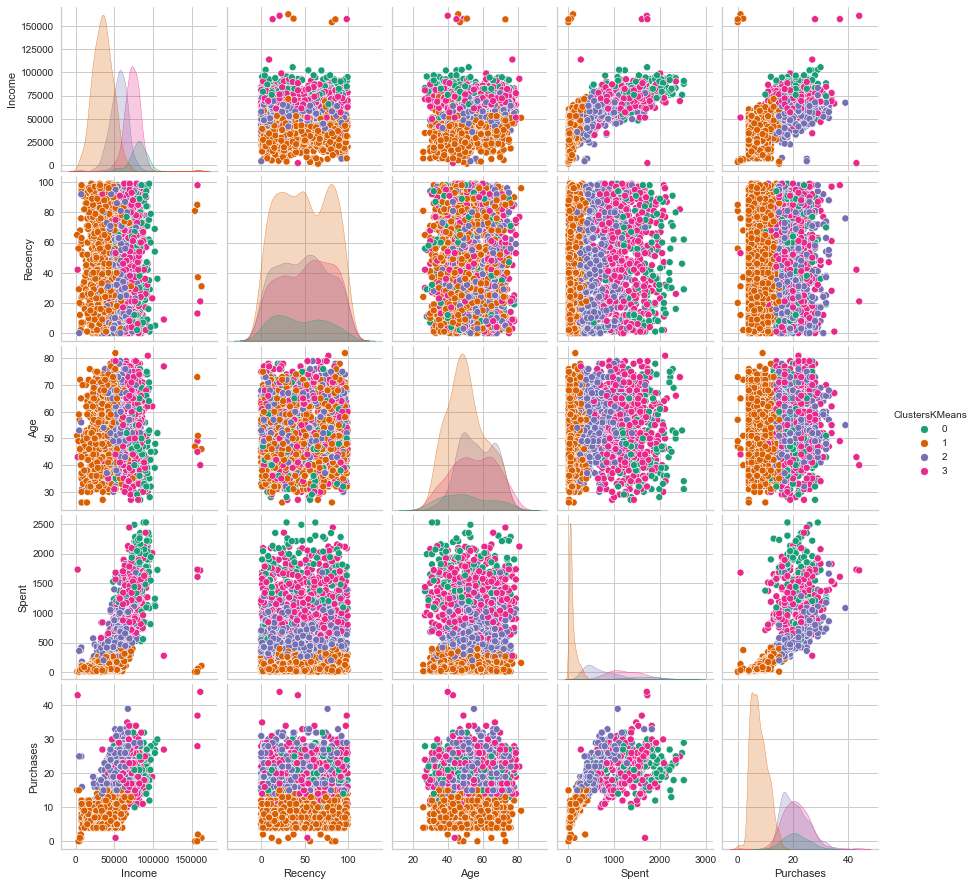

In [105]:
# Plotando os principais atributos do dataset em pares e relacionados aos clusters
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "ClustersKMeans"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "ClustersKMeans", palette="Dark2")
#Taking hue 
_ = plt.show()

### Conclusões Finais

Como era de se esperar, a análise da quantidade de produtos comprados corrobora em sua maior parte com as conclusões obtidas das análises sobre a quantia gasta, de maneira que os grupos de clientes que de um modo geral gastam mais também compram uma maior quantidade de produtos. Adicionalmente, um detalhe interessante de ser pontuado é que os clientes agregados no `cluster 0` apesar de possuírem comportamento semelhante aos dos `clusters 2 e 3` no que tange à quantidade de item comprados, mostram-se aptos à gastarem uma quantidade maior em suas compras.

De forma geral foi possível aferir que o `cluster 0` é um cliente em propenso a comprar itens mais caros e em maior quantidade dado seu gasto elevado, talvez seja interessante direncionar campanhas a tal grupo com itens mais sofisticados e/ou com uma temática romântica adulta dado que o grupo apresenta elementos em idade adulta, sem filhos, mas em relacionamento civis.

Para o `cluster 1`, é um grupo que pode ser mais objetivo focar em produtos mais baratos, talvez algo voltado ao público infantil, visto que a maioria de seus indivíduos são pais e possuem uma renda mais baixa em relação aos demais grupos.

Em relação ao `cluster 2` campanhas voltadas a crianças e/ou com itens de valor mediano pode surtir um efeito positivo em tal grupo dado que o mesmo demonstrou um gasto mais distribuído e que seus indivíduos em sua maioria são pais.

Por fim, para o `cluster 3` campanhas e produtos com valor médio para alto, sem enfoque infantil, demonstra ser algo plausível de aceitação por tal grupo, pois o mesmo possue um gasto elevado em relação aos demais e, em sua maioria, são indivíduos sem filhos.